#Machine Learning Applied in the Evaluation of Airport Projects# 
#SITRAER 2022#

Universidade Federal de Pernambuco (UFPE)

Data: Agosto / 2022

Autores:
*   Ítalo Guedes - italo.guedes@ufpe.br
*   Max Andrade - max.andrade@ufpe.br 
*   Cleber Zanchettin - cz@cin.ufpe.br 



#Importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import seaborn as sns
from mlxtend.plotting import plot_learning_curves



#Importação do Dataset (Excel)

In [ ]:
df = pd.read_csv('/content/sample_data/DATASET_TPS_.csv', delimiter=';')
df.head()

,largura_check-in,comprimento_check-in,largura_fila embarque,comprimento_fila embarque,status
0,4.0,5.0,7.0,11.0,NÃO APTO
1,5.0,2.0,6.0,20.0,NÃO APTO
2,8.0,3.0,3.0,25.0,NÃO APTO
3,15.0,2.0,3.0,11.0,NÃO APTO
4,13.0,5.0,7.0,21.0,APTO


#Visualização dos Dados

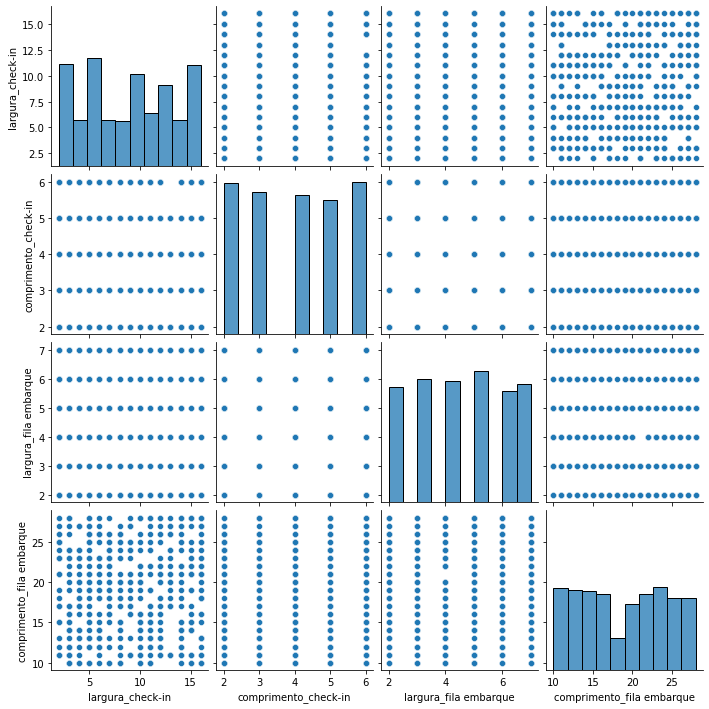

In [ ]:
sns.pairplot(df)
plt.show()

#Pré-processamento *inputs*

In [ ]:
X = df.drop('status', axis=1)
y = df.status
X

,largura_check-in,comprimento_check-in,largura_fila embarque,comprimento_fila embarque
0,4.0,5.0,7.0,11.0
1,5.0,2.0,6.0,20.0
2,8.0,3.0,3.0,25.0
3,15.0,2.0,3.0,11.0
4,13.0,5.0,7.0,21.0
...,...,...,...,...
495,8.0,4.0,3.0,13.0
496,6.0,3.0,6.0,11.0
497,9.0,2.0,2.0,16.0
498,16.0,6.0,6.0,13.0


#Separando *inputs* e *outputs*

In [ ]:
from sklearn.preprocessing import MinMaxScaler

normalizador = MinMaxScaler()
X_norm = normalizador.fit_transform(X)
X_norm

array([[0.14285714, 0.75      , 1.        , 0.05555556],
       [0.21428571, 0.        , 0.8       , 0.55555556],
       [0.42857143, 0.25      , 0.2       , 0.83333333],
       ...,
       [0.5       , 0.        , 0.        , 0.33333333],
       [1.        , 1.        , 0.8       , 0.16666667],
       [0.57142857, 0.5       , 0.6       , 0.27777778]])

#Implementando o algoritmo KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Treinando o classificador KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_norm, y)

KNeighborsClassifier()

#Separando conjunto de treino e teste

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#criando variáveis
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, train_size=2/3)

#Avaliando a acurácia do algoritmo KNN

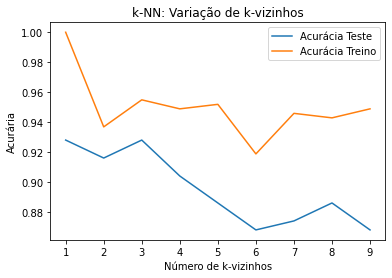

In [ ]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Variação de k-vizinhos')
plt.plot(neighbors, test_accuracy, label = 'Acurácia Teste')
plt.plot(neighbors, train_accuracy, label = 'Acurácia Treino')
plt.legend()
plt.xlabel('Número de k-vizinhos')
plt.ylabel('Acurária')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

accuracy_score(y_test, knn.predict(X_test))

0.9281437125748503

In [ ]:
resultado_knn = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, resultado_knn))

              precision    recall  f1-score   support

        APTO       0.89      0.96      0.92        76
    NÃO APTO       0.96      0.90      0.93        91

    accuracy                           0.93       167
   macro avg       0.93      0.93      0.93       167
weighted avg       0.93      0.93      0.93       167



#Avaliando o classificador (a partir de um novo projeto)

In [ ]:
novo_projeto = [[2.00, 3.00, 20.00, 3.00]]
normalizador.transform(novo_projeto)
X_new = normalizador.transform(novo_projeto)
X_new

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[ 0.        ,  0.25      ,  3.6       , -0.38888889]])

In [ ]:
knn.predict(X_new)

array(['APTO'], dtype=object)